In [50]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
df=pd.read_csv("diabetes_dataset_2.csv")
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136.0,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93.0,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118.0,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139.0,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137.0,184,12.74,7.20,23.5,Type 2,1


# **Preprocessing**

In [52]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes_dataset_2.csv')

df = df.drop_duplicates()


cols_to_drop = [
    'ethnicity', 'education_level', 'income_level', 
    'employment_status', 'diabetes_stage'
]
df = df.drop(columns=cols_to_drop, errors='ignore')


num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_cols = ['bmi', 'glucose_fasting', 'insulin_level', 'hba1c']
cat_cols = ['smoking_status']

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


for col in ['gender', 'smoking_status']:
    df[col] = df[col].astype(str).str.strip().str.lower()

df = pd.get_dummies(df, columns=['gender', 'smoking_status'], drop_first=True)


numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'diagnosed_diabetes' in numeric_features:
    numeric_features.remove('diagnosed_diabetes')

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
        
df.head(20)

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,gender_male,gender_other,smoking_status_former,smoking_status_never
0,0.504853,-1.414536,1.134186,-0.165543,0.823532,0.773353,-0.527560,-0.578341,-0.293146,0.674575,...,0.697218,2.457138,-0.558942,2.113903,-0.065269,1,1,0,0,1
1,-0.136482,-0.708088,0.282770,0.395898,-0.454037,1.097961,-0.527560,-0.578341,-0.293146,-0.478677,...,-0.665151,-0.321138,-1.469893,-1.130172,-0.795132,0,0,0,1,0
2,0.633120,-0.708088,-0.734199,0.227466,2.739884,0.854505,1.895519,-0.578341,-0.293146,-0.618938,...,0.126924,1.132611,-0.828466,1.261538,1.604571,1,1,0,0,1
3,1.530990,-1.414536,-0.828801,-1.456856,-0.362782,-0.322202,-0.527560,-0.578341,-0.293146,0.097949,...,0.792267,3.006332,-0.784590,3.195261,0.885766,1,0,0,0,1
4,-0.264749,-0.708088,-0.119287,0.676618,0.367257,-0.403354,-0.527560,-0.578341,-0.293146,-0.774783,...,0.728901,0.777251,0.774057,0.867160,-0.739840,1,1,0,0,1
5,-0.264749,-0.001639,0.058091,1.687211,-0.727801,-0.241049,-0.527560,-0.578341,-0.293146,-0.011142,...,-0.443370,-0.870332,-0.055411,-0.621298,-0.739840,0,0,0,0,1
6,1.595124,-1.414536,-0.781500,1.799499,0.732277,0.813929,-0.527560,1.729084,-0.293146,-0.166987,...,-0.411687,-1.936414,0.230829,-1.626325,0.653537,0,0,0,0,1
7,0.761387,-0.708088,-0.521345,-1.063848,1.827335,2.802157,-0.527560,1.729084,3.411265,-0.354001,...,-0.126540,0.938778,-0.015713,0.663611,0.443424,1,1,0,0,0
8,-0.521284,-0.708088,-0.060161,0.395898,1.371061,1.016809,-0.527560,-0.578341,3.411265,-0.229325,...,0.063558,0.389584,-0.696838,0.485505,-0.385966,1,1,0,0,0
9,0.568987,0.704810,-0.391267,1.238059,-1.549095,0.570472,-0.527560,-0.578341,-0.293146,0.082365,...,-1.203763,-1.645665,-0.949648,-1.944371,-0.021034,0,0,0,0,0


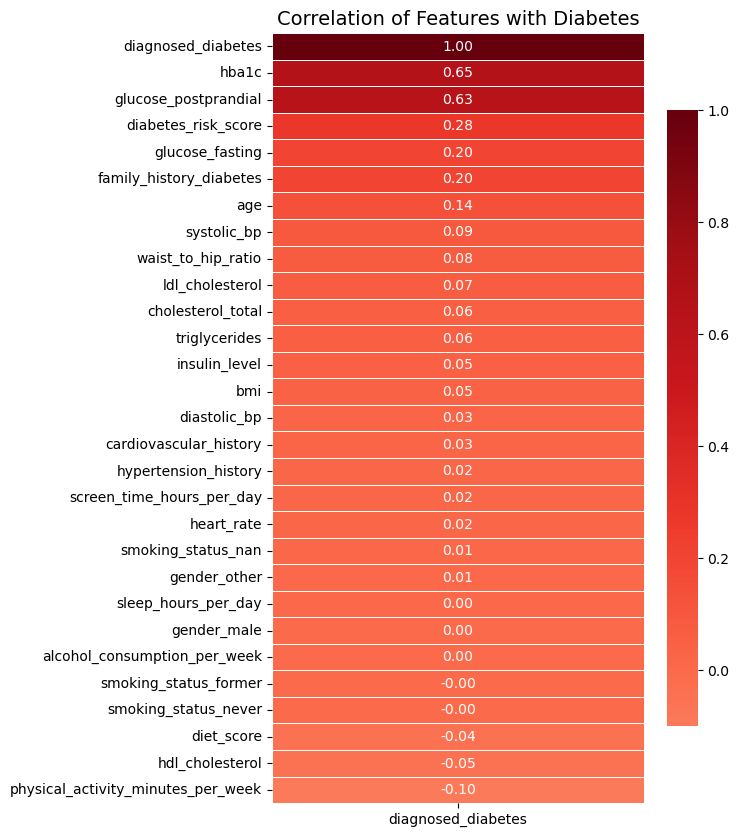

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_csv('diabetes_dataset_2.csv')
df = df.drop_duplicates()


cols_to_drop = ['ethnicity', 'education_level', 'income_level', 'employment_status', 'diabetes_stage']
df = df.drop(columns=cols_to_drop, errors='ignore')

num_imputer = SimpleImputer(strategy='median')
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = num_imputer.fit_transform(df[num_cols]) 

for col in ['gender', 'smoking_status']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

df = pd.get_dummies(df, columns=['gender', 'smoking_status'], drop_first=True)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


target_corr = df.corr()[['diagnosed_diabetes']].sort_values(by='diagnosed_diabetes', ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(
    target_corr, 
    annot=True,          
    fmt=".2f",           
    cmap='Reds',         
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation of Features with Diabetes', fontsize=14)
plt.show()

# **Model 1: Logistic Regression**

In [54]:
X = df.drop('diagnosed_diabetes', axis=1)
y = df['diagnosed_diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 59999
Testing set size: 15000


In [55]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

binary_cols = [col for col in X_train.columns if X_train[col].nunique() <= 2]
numeric_to_scale = [col for col in numeric_cols if col not in binary_cols]

scaler = StandardScaler()

X_train[numeric_to_scale] = scaler.fit_transform(X_train[numeric_to_scale])
X_test[numeric_to_scale] = scaler.transform(X_test[numeric_to_scale])



In [56]:

import joblib

joblib.dump(log_reg, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_train.columns.tolist(), 'features.pkl')

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

--- Logistic Regression Performance ---
Accuracy Score: 0.8551

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81      6024
         1.0       0.87      0.90      0.88      8976

    accuracy                           0.86     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.86      0.85     15000



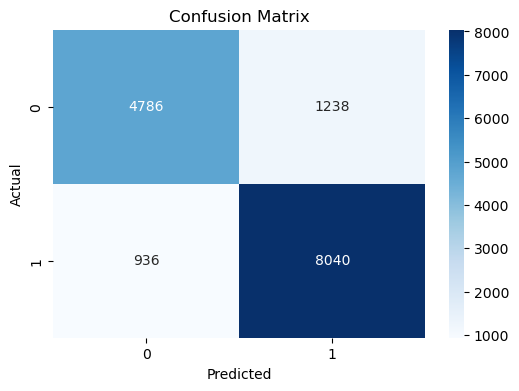

In [57]:
y_pred = log_reg.predict(X_test)

print("--- Logistic Regression Performance ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Model 2: K-Nearest-Neighbor (KNN)**

In [58]:

import joblib

joblib.dump(knn, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_train.columns.tolist(), 'features.pkl')

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNN Model training complete.")

KNN Model training complete.


--- KNN Performance ---
Accuracy Score: 0.8107

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77      6024
         1.0       0.85      0.83      0.84      8976

    accuracy                           0.81     15000
   macro avg       0.80      0.81      0.80     15000
weighted avg       0.81      0.81      0.81     15000



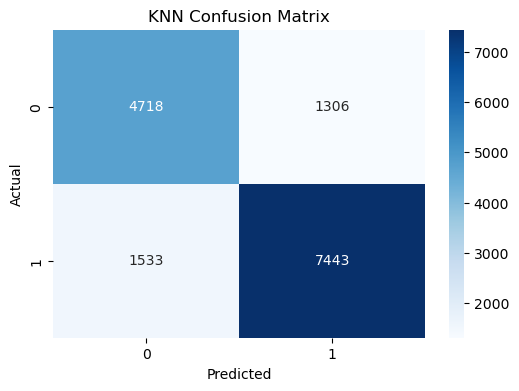

In [59]:
y_pred = knn.predict(X_test)

print("--- KNN Performance ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Model 3: Boosting**

In [60]:
import joblib

joblib.dump(gb_model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_train.columns.tolist(), 'features.pkl')


gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)
gb_model.fit(X_train, y_train)

print("Gradient Boosting Model training complete.")

Gradient Boosting Model training complete.


--- Gradient Boosting Performance ---
Accuracy Score: 0.9129

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      6024
         1.0       0.99      0.87      0.92      8976

    accuracy                           0.91     15000
   macro avg       0.91      0.92      0.91     15000
weighted avg       0.92      0.91      0.91     15000


Raw Confusion Matrix (Numeric):
[[5912  112]
 [1194 7782]]


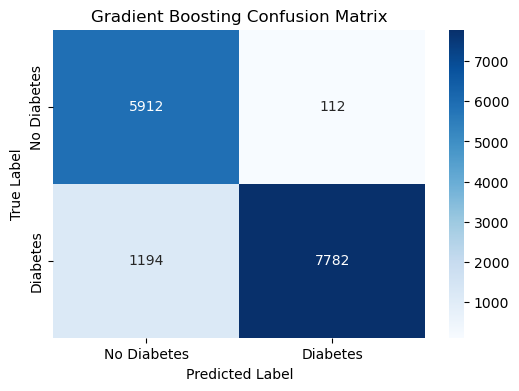

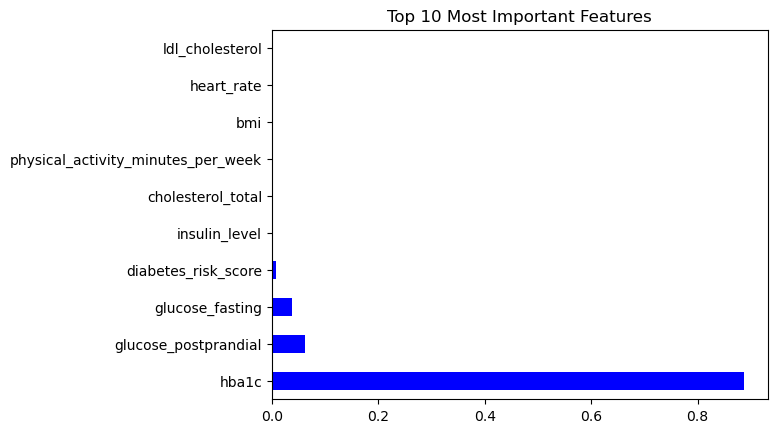

In [61]:
y_pred = gb_model.predict(X_test)

print("--- Gradient Boosting Performance ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nRaw Confusion Matrix (Numeric):")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

importances = pd.Series(gb_model.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh', color='blue')
plt.title("Top 10 Most Important Features")
plt.show()

# **Model 4: Random Forest**

In [62]:
import joblib

joblib.dump(rf_model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_train.columns.tolist(), 'features.pkl')


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest training complete.")

Random Forest training complete.


--- Random Forest Performance ---
Accuracy Score: 0.9136

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      6024
         1.0       0.99      0.87      0.92      8976

    accuracy                           0.91     15000
   macro avg       0.91      0.93      0.91     15000
weighted avg       0.93      0.91      0.91     15000


Raw Confusion Matrix (Numeric):
[[5939   85]
 [1211 7765]]


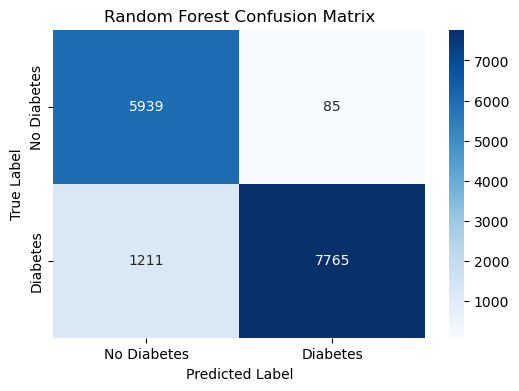

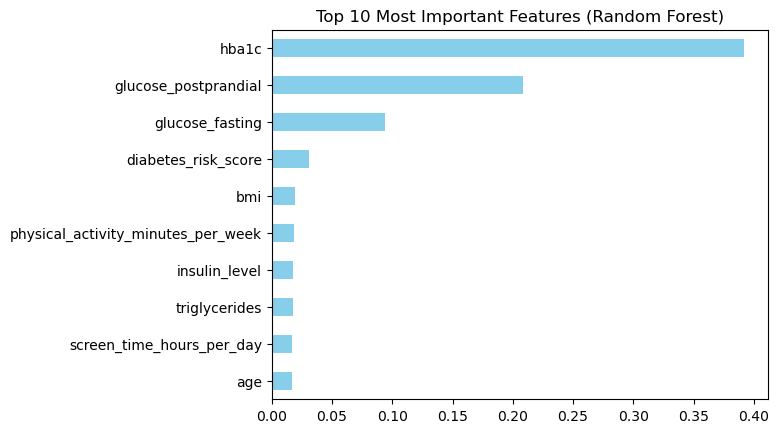

In [63]:
y_pred = rf_model.predict(X_test)

print("--- Random Forest Performance ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nRaw Confusion Matrix (Numeric):")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances.nlargest(10).sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 Most Important Features (Random Forest)")
plt.show()

# **Model 5: Decision Tree**

In [64]:
X = df.drop('diagnosed_diabetes', axis=1)
y = df['diagnosed_diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 59999
Testing set size: 15000


In [73]:
import joblib

joblib.dump(dt_model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_train.columns.tolist(), 'features.pkl')


dt_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=7, 
    min_samples_split=20,
    random_state=42
)

dt_model.fit(X_train, y_train)

print("Decision Tree training complete.")

Decision Tree training complete.


--- Decision Tree Performance ---
Accuracy Score: 0.9093

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      6024
           1       0.98      0.86      0.92      8976

    accuracy                           0.91     15000
   macro avg       0.91      0.92      0.91     15000
weighted avg       0.92      0.91      0.91     15000



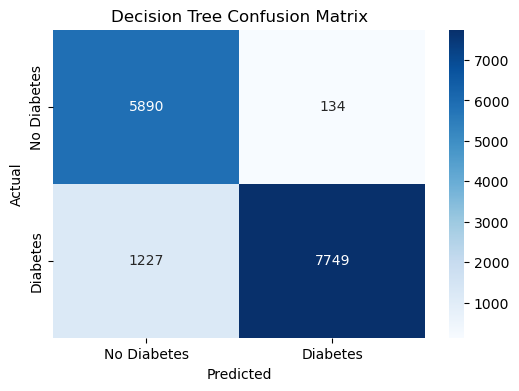

In [74]:
y_pred = dt_model.predict(X_test)

print("--- Decision Tree Performance ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **ROC Curve**

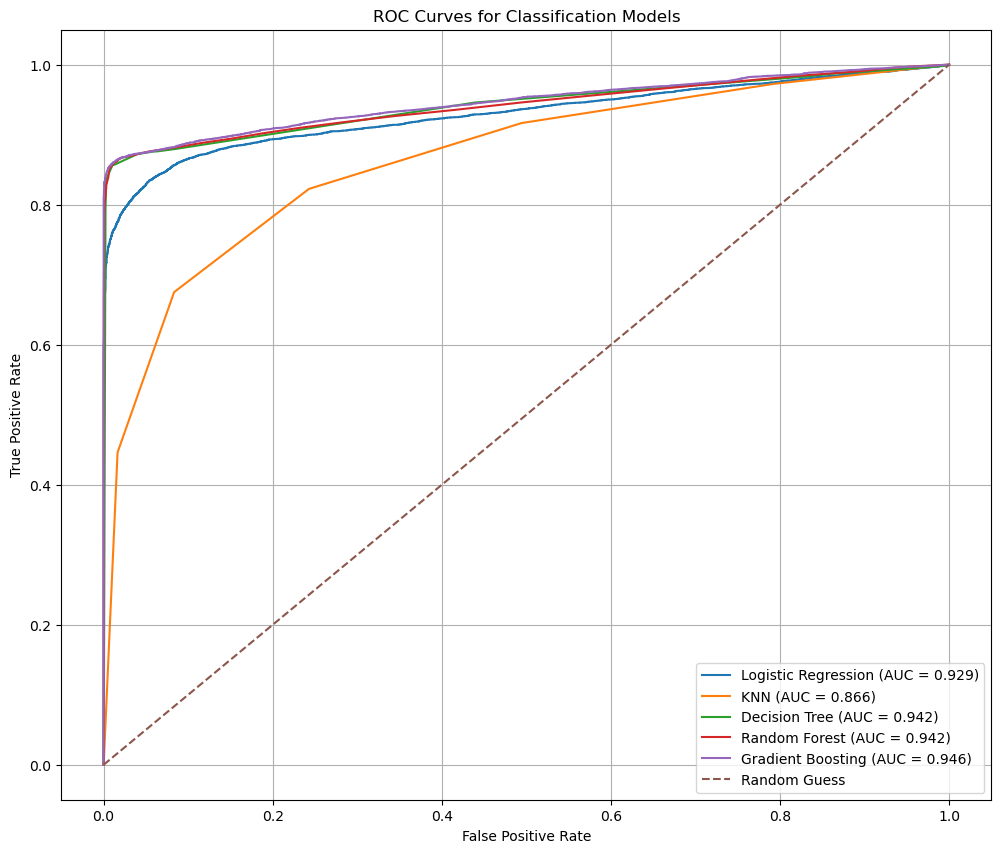

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('diabetes_dataset_2.csv')
df = df.drop_duplicates()
cols_to_drop = ['ethnicity', 'education_level', 'income_level', 'employment_status', 'diabetes_stage']
df = df.drop(columns=cols_to_drop, errors='ignore')

num_imputer = SimpleImputer(strategy='median')
num_cols = ['bmi', 'glucose_fasting', 'insulin_level', 'hba1c']
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df['smoking_status'] = cat_imputer.fit_transform(df[['smoking_status']]).ravel()

for col in ['gender', 'smoking_status']:
    df[col] = df[col].astype(str).str.strip().str.lower()
df = pd.get_dummies(df, columns=['gender', 'smoking_status'], drop_first=True)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

X = df.drop('diagnosed_diabetes', axis=1)
y = df['diagnosed_diabetes']
X_train_f, X_test, y_train_f, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train_f.sample(10000, random_state=42)
y_train = y_train_f.loc[X_train.index]

scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
binary_cols = [c for c in X_train.columns if X_train[c].nunique() <= 2]
to_scale = [c for c in numeric_cols if c not in binary_cols]

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test_scaled[to_scale] = scaler.transform(X_test[to_scale])

best_lr_model = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)
best_dt_model = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)
bag_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42).fit(X_train, y_train)
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42).fit(X_train, y_train)

models_and_data = {
    "Logistic Regression": (best_lr_model, X_test_scaled, y_test),
    "KNN": (knn_model, X_test_scaled, y_test),
    "Decision Tree": (best_dt_model, X_test, y_test),
    "Random Forest": (bag_model, X_test, y_test),
    "Gradient Boosting": (gb_model, X_test, y_test)
}

plt.figure(figsize=(12, 10))

for name, (model, X_test_data, y_test_data) in models_and_data.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_data)[:, 1]
    else: 
        y_scores = model.predict(X_test_data)

    fpr, tpr, _ = roc_curve(y_test_data, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Classification Models")
plt.legend()
plt.grid()
plt.savefig("roc_curves.png")
plt.show()


# **Comparison** 

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('diabetes_dataset_2.csv').drop_duplicates()
df = df.drop(columns=['ethnicity', 'education_level', 'income_level', 'employment_status', 'diabetes_stage'], errors='ignore')

num_cols = ['bmi', 'glucose_fasting', 'insulin_level', 'hba1c']
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])
df['smoking_status'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['smoking_status']]).ravel()

for col in ['gender', 'smoking_status']:
    df[col] = df[col].astype(str).str.strip().str.lower()
df = pd.get_dummies(df, columns=['gender', 'smoking_status'], drop_first=True)

for col in df.columns:
    if df[col].dtype == 'bool': df[col] = df[col].astype(int)

X = df.drop('diagnosed_diabetes', axis=1)
y = df['diagnosed_diabetes']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train_full.sample(15000, random_state=42)
y_train = y_train_full.loc[X_train.index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "KNN": (KNeighborsClassifier(n_neighbors=5), X_train_scaled, X_test_scaled),
    "Logistic Regression": (LogisticRegression(max_iter=1000), X_train_scaled, X_test_scaled),
    "Boosting": (GradientBoostingClassifier(n_estimators=100, random_state=42), X_train, X_test),
    "Bagging": (RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42), X_train, X_test),
    "Decision Tree": (DecisionTreeClassifier(max_depth=10, random_state=42), X_train, X_test)
}

f1_results = {}

for name, (model, train_data, test_data) in models.items():
    model.fit(train_data, y_train)
    preds = model.predict(test_data)
    score = f1_score(y_test, preds)
    f1_results[name] = score
    print(f"{name}: F1-Score = {score:.4f}")

best_model_name = max(f1_results, key=f1_results.get)
best_f1_score = f1_results[best_model_name]

print("-" * 30)
print(f"THE BEST MODEL IS: {best_model_name}")
print(f"Highest F1-Score: {best_f1_score:.4f}")


KNN: F1-Score = 0.8218
Logistic Regression: F1-Score = 0.8809
Boosting: F1-Score = 0.9222
Bagging: F1-Score = 0.9225
Decision Tree: F1-Score = 0.9159
------------------------------
THE BEST MODEL IS: Bagging
Highest F1-Score: 0.9225


In [75]:
import joblib

# Replace 'log_reg' with whichever model variable you want to use
joblib.dump(log_reg, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# SAVE IMAGES - This is the secret to speed!
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.savefig('heatmap.png')
plt.close() # Important to close so it doesn't stay in memory